<a href="https://colab.research.google.com/github/bolulka/NeuralNetworks/blob/main/lab8/lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лаб. 8.1
Задание 1.  (из  темы  8.1):

Используйте обученные сверточные нейронные сети для распознавания своих объектов и рукописных цифр.

Задание 2.  (из  темы  8.2):

Используйте предварительно обученную сеть VGG16 в Keras для распознавания своего изображения.

Задание 3.  (из  темы  8.2):

Используйте предварительно обученную сеть ResNet50 в Keras для распознавания своего изображения.

[[9.78817403e-01 2.45474773e-14 2.11724397e-02 1.55320354e-10
  1.01442938e-05 7.17105750e-14 2.46677158e-11 1.47949619e-13
  3.19210103e-10 1.06539106e-13]]


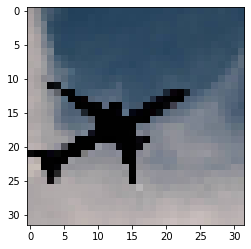

самолет


In [6]:
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image
import matplotlib.pyplot as plt

json_file = open("cifar10_model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("cifar10_model.h5")
loaded_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

img_path = 'plane.jpg'
img = image.load_img(img_path, target_size=(32, 32))

x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

prediction = loaded_model.predict(x)
print(prediction)

plt.imshow(img)
plt.show()

classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

print(classes[np.argmax(prediction)])


In [7]:
import numpy as np
from keras.preprocessing import image
from keras.models import model_from_json
import matplotlib.pyplot as plt

json_file = open("mnist_model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("mnist_model.h5")
loaded_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

img_path = '4.png'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
# plt.imshow(img, cmap='gray')
# plt.show()
x = image.img_to_array(img)
x = np.array([
    [255 - pixel[0] for row in x for pixel in row]
], 'float32')
x /= 255

prediction = loaded_model.predict(x)

print(np.argmax(prediction))


4


In [8]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

model = VGG16(weights='imagenet')

img = image.load_img('cat.jpeg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

print('Результаты распознавания:', decode_predictions(preds, top=3)[0])
# Результаты распознавания:
# [('n02127052', 'lynx', 0.764345), ('n02123159', 'tiger_cat', 0.13802426), ('n02123045', 'tabby', 0.063415304)]


40960/35363 [==================================] - 0s 0us/step
Результаты распознавания: [('n02127052', 'lynx', 0.764345), ('n02123159', 'tiger_cat', 0.13802412), ('n02123045', 'tabby', 0.06341542)]


In [9]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img = image.load_img('cat.jpeg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

print('Результаты распознавания:', decode_predictions(preds, top=3)[0])
# Результаты распознавания:
# [('n02127052', 'lynx', 0.35676384), ('n02123159', 'tiger_cat', 0.2503496), ('n02123045', 'tabby', 0.2361157)]

102973440/102967424 [==============================] - 1s 0us/step
Результаты распознавания: [('n02127052', 'lynx', 0.34761113), ('n02123159', 'tiger_cat', 0.27828816), ('n02123045', 'tabby', 0.2454477)]
